In [1]:
import os
import pandas as pd
from datetime import datetime
import calendar
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

from plotting_utils import plot_normalized_monthly_counts, GREEN, PURPLE

In [2]:
truss_df = pd.read_feather("DataFrames/Liz_Truss.feather") 
lettuce_df = pd.read_feather("DataFrames/Liz_Truss_lettuce.feather")

In [3]:
display(truss_df.head())

,revision_id,timestamp,username,userid,comment,text_length,year,month
2522,1253353646,2024-10-25 14:54:55+00:00,Rfl0216,27738727,/* News */,160213,2024,10
2508,1253353474,2024-10-25 14:53:59+00:00,Rfl0216,27738727,/* News */,160221,2024,10
2512,1252555617,2024-10-21 21:44:52+00:00,Tim O'Doherty,42923857,Undo,160229,2024,10
2507,1252459885,2024-10-21 13:09:08+00:00,Wabbuh,48227547,None,160251,2024,10
2511,1252007563,2024-10-19 08:12:14+00:00,UndercoverClassicist,44786610,cosmetic lint-y change (template to plaintext ...,160229,2024,10


In [4]:
display(lettuce_df.head())

,revision_id,timestamp,username,userid,comment,text_length,year,month
269,1253357388,2024-10-25 15:21:33+00:00,Tavantius,47819881,/* Truss's response */ Sourced for [[WP:CITEHU...,31243,2024,10
272,1253203304,2024-10-24 20:46:54+00:00,Citation bot,7903804,Altered title. | [[:en:WP:UCB|Use this bot]]. ...,31008,2024,10
271,1252730818,2024-10-22 18:19:30+00:00,QuantumFoam66,47798589,Undid revision [[Special:Diff/1250720229|12507...,31008,2024,10
264,1250720229,2024-10-12 03:32:41+00:00,QuantumFoam66,47798589,removed [[Category:Livestreams]]; added [[Cate...,31016,2024,10
266,1250071470,2024-10-08 09:38:03+00:00,AnomieBOT,7611264,Dating maintenance tags: {{Cn}},31008,2024,10


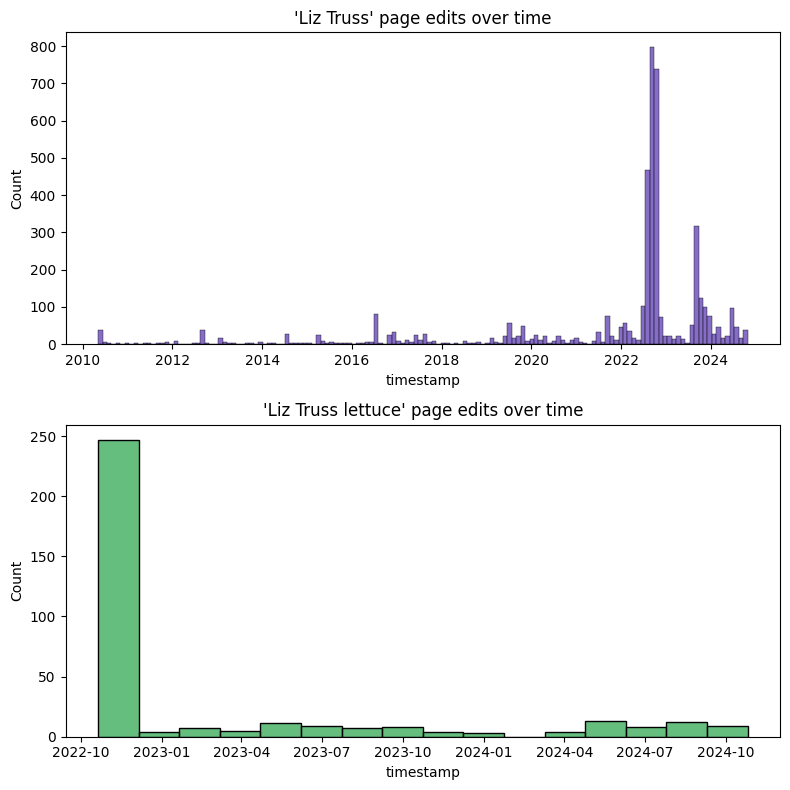

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

sns.histplot(truss_df["timestamp"], color=PURPLE, ax=ax1)
ax1.set_title("'Liz Truss' page edits over time")

sns.histplot(lettuce_df["timestamp"], color=GREEN, ax=ax2)
ax2.set_title("'Liz Truss lettuce' page edits over time")

fig.tight_layout()

plt.show()

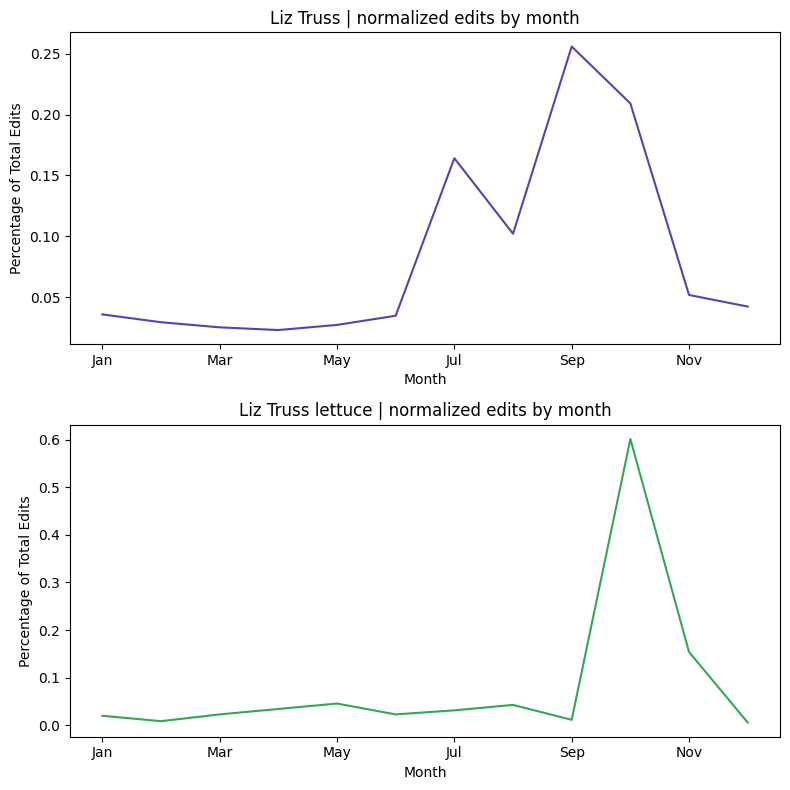

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

ax1 = plot_normalized_monthly_counts(
    truss_df["timestamp"], title="Liz Truss", color=PURPLE, axis=ax1
)

ax2 = plot_normalized_monthly_counts(
    lettuce_df["timestamp"], title="Liz Truss lettuce", color=GREEN, axis=ax2
)

fig.tight_layout()

plt.show()

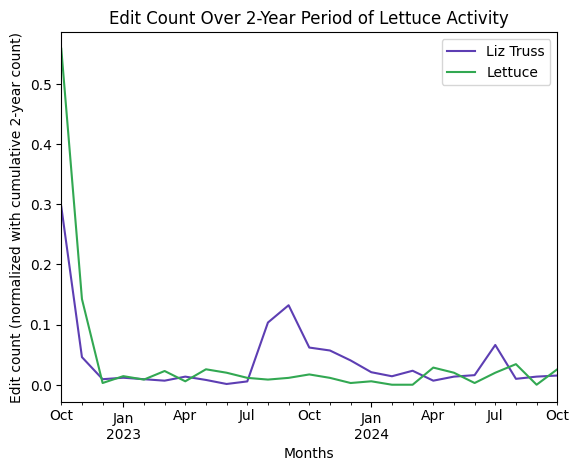

In [15]:
earliest_time = lettuce_df[["timestamp"]].min(skipna=False).iloc[0]

latest_time = lettuce_df[["timestamp"]].max(skipna=False).iloc[0]

mask = truss_df["timestamp"] >= earliest_time 
truss_filtered = truss_df[mask]

trussmonthly = truss_filtered[["timestamp", "revision_id"]].resample('ME',
    on="timestamp").count()

trussmonthly = trussmonthly / trussmonthly.sum()

lettucemonthly = lettuce_df[["timestamp", "revision_id"]].resample('ME',
    on="timestamp").count()

lettucemonthly = lettucemonthly / lettucemonthly.sum()

plt.figure()
ax = plt.gca()

trussmonthly.plot(ax=ax, color=PURPLE)
lettucemonthly.plot(ax=ax, color=GREEN)

plt.xlabel("Months")
plt.ylabel("Edit count (normalized with cumulative 2-year count)")
plt.legend(["Liz Truss", "Lettuce"])
plt.title("Edit Count Over 2-Year Period of Lettuce Activity")

plt.show()

In [51]:
from scipy import stats

ks_statistic, p_value =  stats.kstest(trussmonthly, lettucemonthly)

print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {p_value}")

KS Statistic: [0.24]
p-value: [0.4754535]


In [7]:
truss_df_undoing_vand = pd.read_feather("DataFrames/Liz_Truss.feather") 

#contains revert, Revert, undo, Undid
def containsVandUndo(edit_row):
    comment = edit_row["comment"]
    if comment:
        comment = comment.lower()
        return "revert" in comment or "undo" in comment or "undid" in comment
    else:
        return False

truss_df_undoing_vand['undoing'] = truss_df_undoing_vand.apply(containsVandUndo, axis=1)

truss_df_undoing_vand.head()

,revision_id,timestamp,username,userid,comment,text_length,year,month,undoing
2522,1253353646,2024-10-25 14:54:55+00:00,Rfl0216,27738727,/* News */,160213,2024,10,False
2508,1253353474,2024-10-25 14:53:59+00:00,Rfl0216,27738727,/* News */,160221,2024,10,False
2512,1252555617,2024-10-21 21:44:52+00:00,Tim O'Doherty,42923857,Undo,160229,2024,10,True
2507,1252459885,2024-10-21 13:09:08+00:00,Wabbuh,48227547,None,160251,2024,10,False
2511,1252007563,2024-10-19 08:12:14+00:00,UndercoverClassicist,44786610,cosmetic lint-y change (template to plaintext ...,160229,2024,10,False


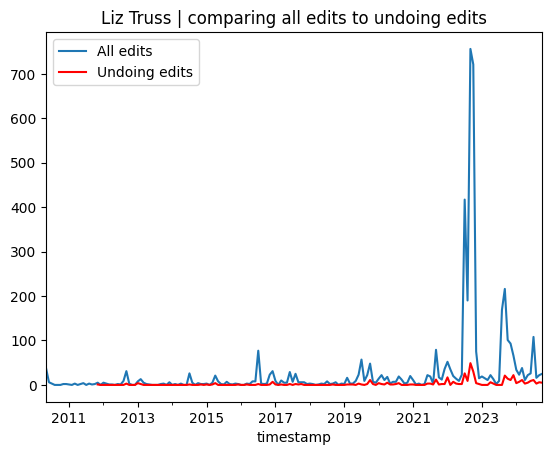

In [12]:
plt.figure()
ax = plt.gca()

truss_baseline_edits_df = (
    truss_df_undoing_vand[["timestamp", "revision_id"]]
    .resample('ME', on="timestamp")
    .count()
)

truss_baseline_edits_df.plot(ax=ax)

truss_undoing_edits_df = truss_df_undoing_vand[truss_df_undoing_vand['undoing'] == True]

truss_undoing_edits_df = (
    truss_undoing_edits_df[["timestamp", "revision_id"]]
    .resample('ME', on="timestamp")
    .count()
)

truss_undoing_edits_df.plot(ax=ax, color="red")

plt.title("Liz Truss | comparing all edits to undoing edits")
plt.legend(["All edits", "Undoing edits"])

plt.show()
